The following dataset is from the National Institute of Diabetes and Kidney Diseases, India. The goal is to predict whether a patient has diabetes based on diagnostic measurements.

Content
All patients in the dataset are women at least 21 years old.

Columns:
Pregnancies: the number of pregnancies
Glucose: Glucose test result
BloodPressure: diastolic blood pressure (mm Hg)
SkinThickness: Triceps skinfold thickness (mm)
Insulin: 2-hour serum insulin (mu U/ml)
BMI: Body Mass Index (weight in kg / (height in m) ^ 2)
DiabetesPedigreeFunction: Diabetes Pedigree Function
Age: Age (years)
Outcome: Class (0 - no diabetes, 1 - diabetes)

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data=pd.read_csv('diabetes.csv')


In [3]:
data.shape

(768, 9)

In [4]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Check the data types of each column
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
# Check for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

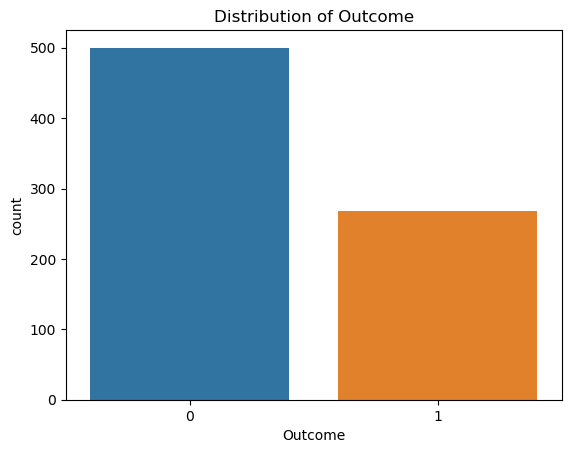

In [9]:
# Visualize the distribution of the target variable (Outcome)
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Outcome')
plt.show()

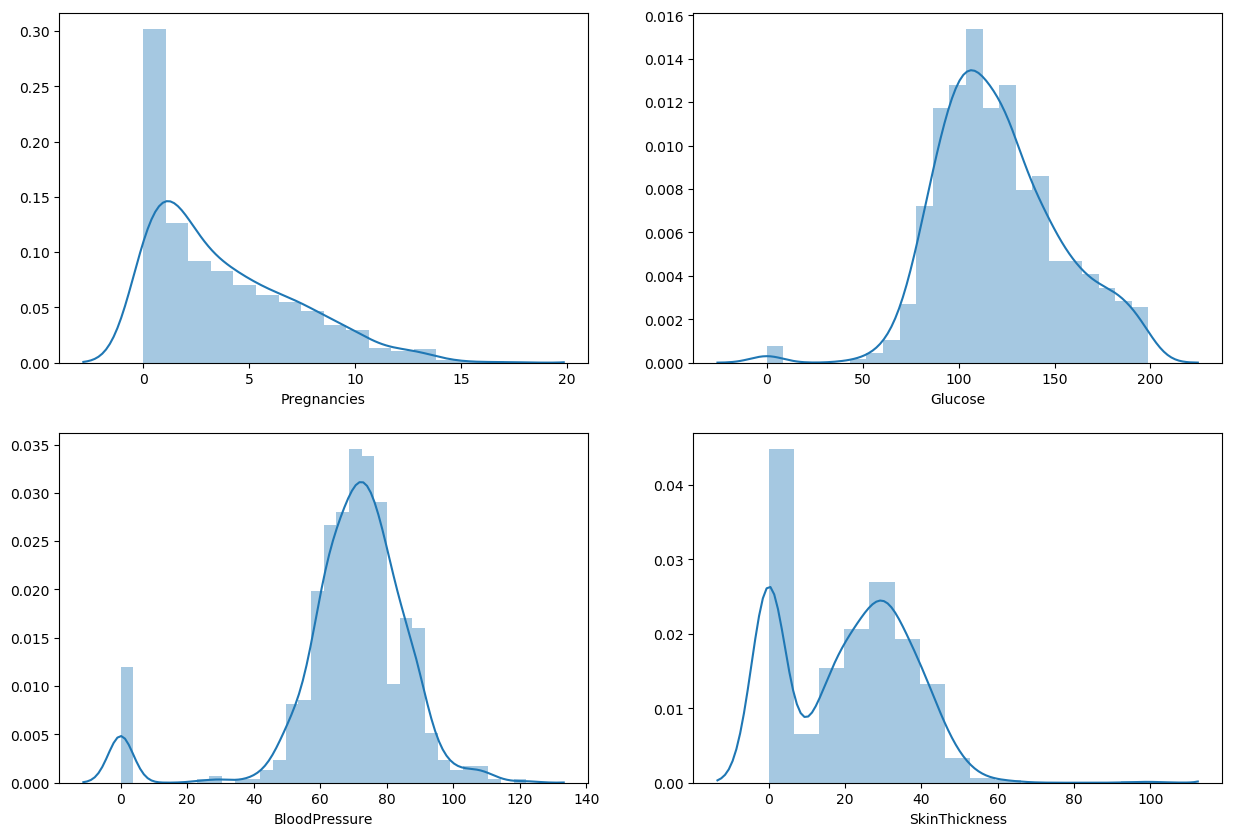

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# General plot names:
sns.distplot(data['Pregnancies'], ax=ax[0, 0])
sns.distplot(data['Glucose'], ax=ax[0, 1])
sns.distplot(data['BloodPressure'], ax=ax[1, 0])
sns.distplot(data['SkinThickness'], ax=ax[1, 1])

plt.show()

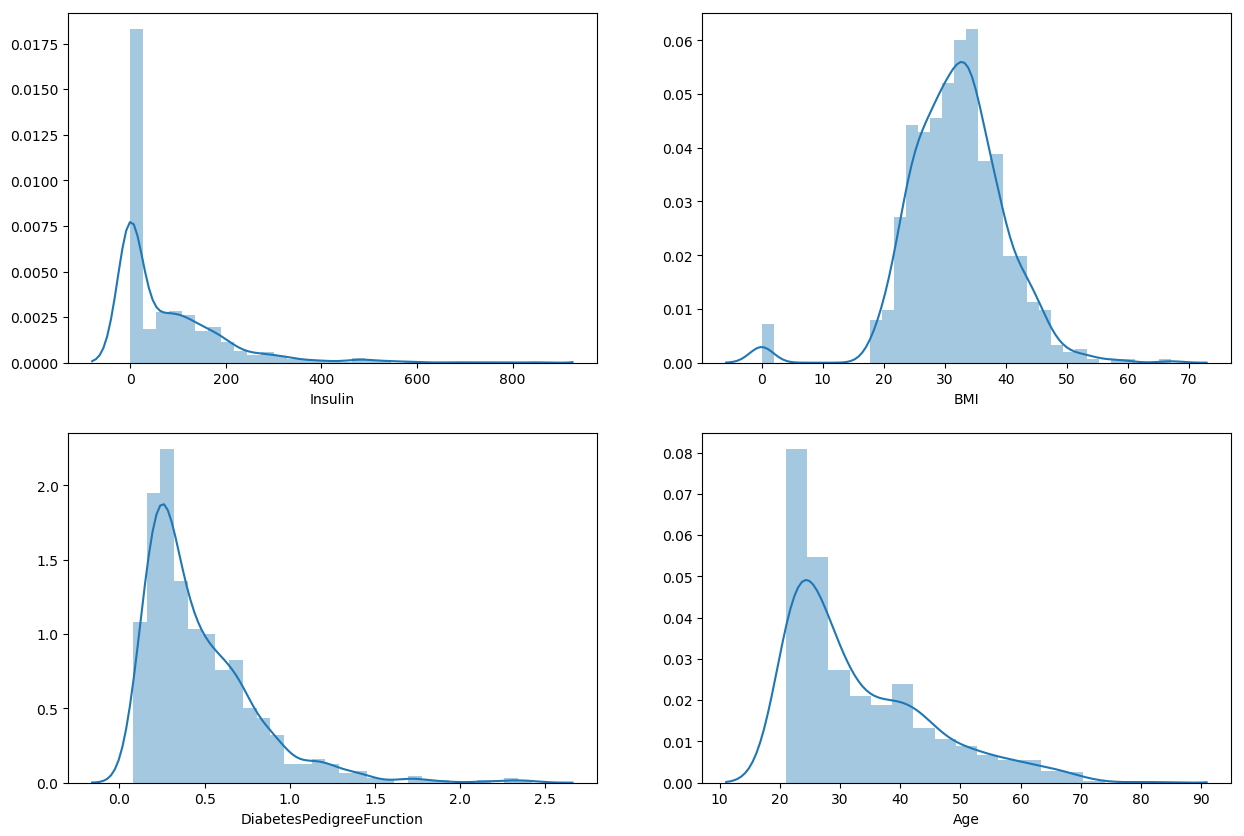

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(data['Insulin'], ax=ax[0, 0])
sns.distplot(data['BMI'], ax=ax[0, 1])
sns.distplot(data['DiabetesPedigreeFunction'], ax=ax[1, 0])
sns.distplot(data['Age'], ax=ax[1, 1])
plt.show()

In [12]:
df=data.copy()

In [13]:
# Variables whose minimum values cannot be equal to 0.
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["Pregnancies", "Outcome"])]
zero_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [14]:
# We are replacing the 0 values in the variables values with NaN.
for col in zero_columns:
    df[col] = np.where(df[col] == 0, np.nan, df[col])
    
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
df_filled = df.fillna(df.mean())

In [16]:
df_filled.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df_filled.corrwith(data['Outcome'].abs().sort_values(ascending=True))

Pregnancies                 0.221898
Glucose                     0.492928
BloodPressure               0.166074
SkinThickness               0.215299
Insulin                     0.214411
BMI                         0.311924
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

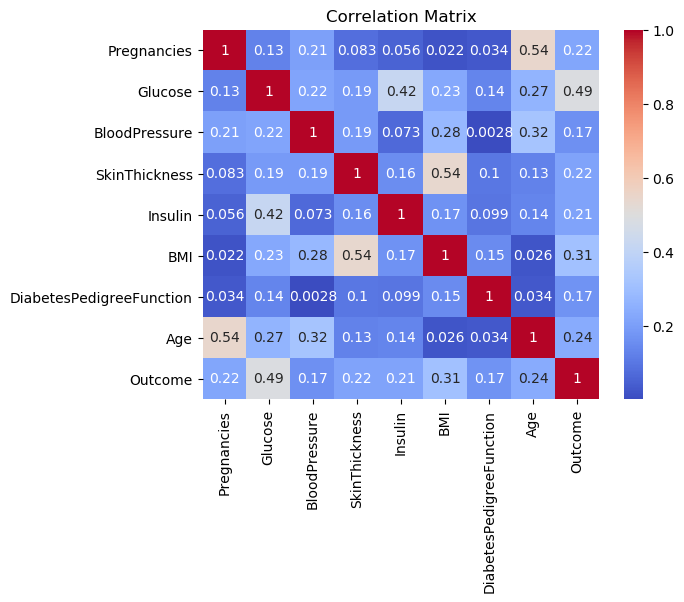

In [18]:
# Visualize the correlation matrix of the features
corr_matrix = df_filled.corr().abs()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
X=df_filled.drop('Outcome', axis=1).values
y=df_filled['Outcome']

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
X=scaler.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [25]:
# Model setup
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn_model = KNeighborsClassifier(n_neighbors=13)

In [75]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [76]:
y_predict = knn_model.predict(X_test)

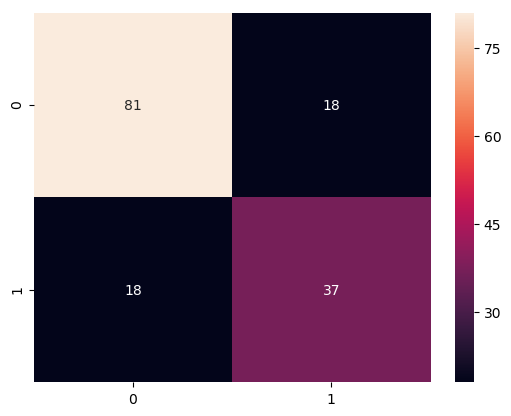

In [77]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [78]:
confusion_matrix(y_test, y_predict)

array([[81, 18],
       [18, 37]], dtype=int64)

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"precision={precision}\n recall={recall}\n f1={f1}\n accuracy={accuracy}")

precision=0.6727272727272727
 recall=0.6727272727272727
 f1=0.6727272727272727
 accuracy=0.7662337662337663


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

   micro avg       0.77      0.77      0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [81]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn_model, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       500
           1       0.67      0.57      0.62       268

   micro avg       0.75      0.75      0.75       768
   macro avg       0.73      0.71      0.72       768
weighted avg       0.75      0.75      0.75       768



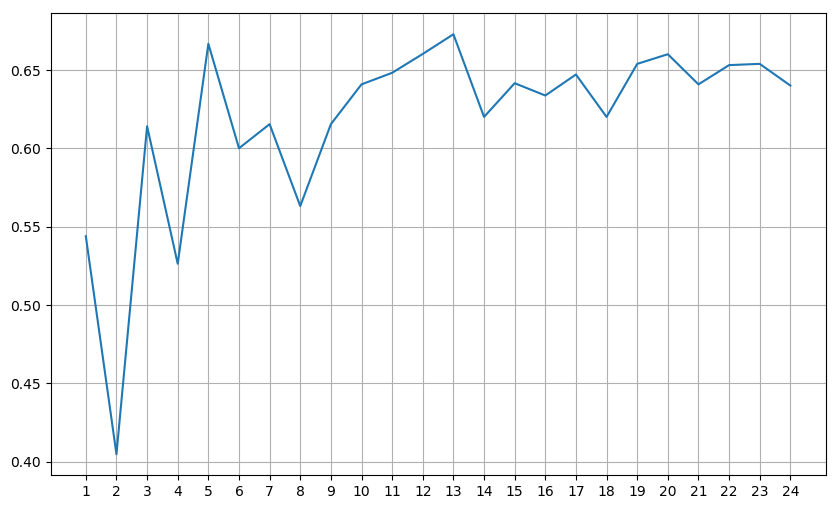

In [82]:
f1=[]
for k in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=k)## value of k
    knn.fit(X_train, y_train)
    y_predict=knn.predict(X_test)
    f1.append(f1_score(y_test,y_predict))
plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid={'n_neighbors': np.arange(1,25)}
knn_gscv=GridSearchCV(knn_model, param_grid, cv=4)
knn_gscv.fit(X,y)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [85]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 20, 22, 16, 21,  8, 12,  8,  6,  5, 12, 19, 18, 15,  7, 16,
       12,  8,  8,  2,  4,  1,  3])

In [86]:
knn_gscv.best_params_

{'n_neighbors': 23}

In [87]:
knn_gscv.best_score_

0.7734375